In [16]:
# Upload Dataset
import kagglehub
import os

path = kagglehub.dataset_download("ihelon/coffee-sales")
print("Path to dataset files:", path)

for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

Path to dataset files: C:\Users\chrde\.cache\kagglehub\datasets\ihelon\coffee-sales\versions\21
C:\Users\chrde\.cache\kagglehub\datasets\ihelon\coffee-sales\versions\21\index_1.csv
C:\Users\chrde\.cache\kagglehub\datasets\ihelon\coffee-sales\versions\21\index_2.csv


In [17]:
# Import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

#Set row and columns size
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [26]:
# Import the data
df = pd.read_csv(os.path.join(path, 'index_1.csv'))
df.shape

(3636, 6)

In [27]:
df.describe()

,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [28]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [19]:
# Get percent of null values
df.isnull().sum()/df.shape[0]

date           0.000000
datetime       0.000000
cash_type      0.000000
card           0.024477
money          0.000000
coffee_name    0.000000
dtype: float64

In [39]:
# Check unique values on categorical columns
columns_to_check = ['cash_type', 'coffee_name']  # example

for col in columns_to_check:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))


Column: cash_type
cash_type
card    3547
cash      89
Name: count, dtype: int64

Column: coffee_name
coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64


In [76]:
# Format date time data
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['datetime'].dt.to_period('M').astype(str)
df['week'] = df['datetime'].dt.isocalendar().week

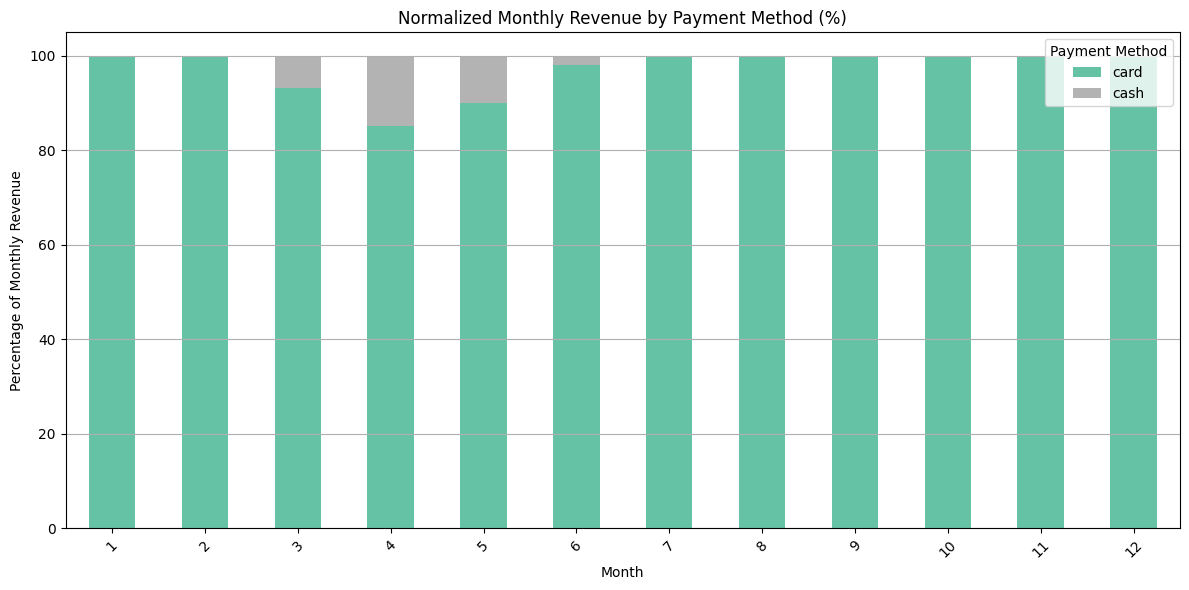

In [92]:
# Monthly transaction value of each payment 
monthly_revenue_payment = df.groupby(['month', 'cash_type'])['money'].sum().unstack(fill_value=0)
monthly_revenue_payment_pct = monthly_revenue_payment.div(monthly_revenue_payment.sum(axis=1), axis=0) * 100

monthly_revenue_payment_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

plt.title("Normalized Monthly Revenue by Payment Method (%)")
plt.xlabel("Month")
plt.ylabel("Percentage of Monthly Revenue")
plt.xticks(rotation=45)
plt.legend(title="Payment Method")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

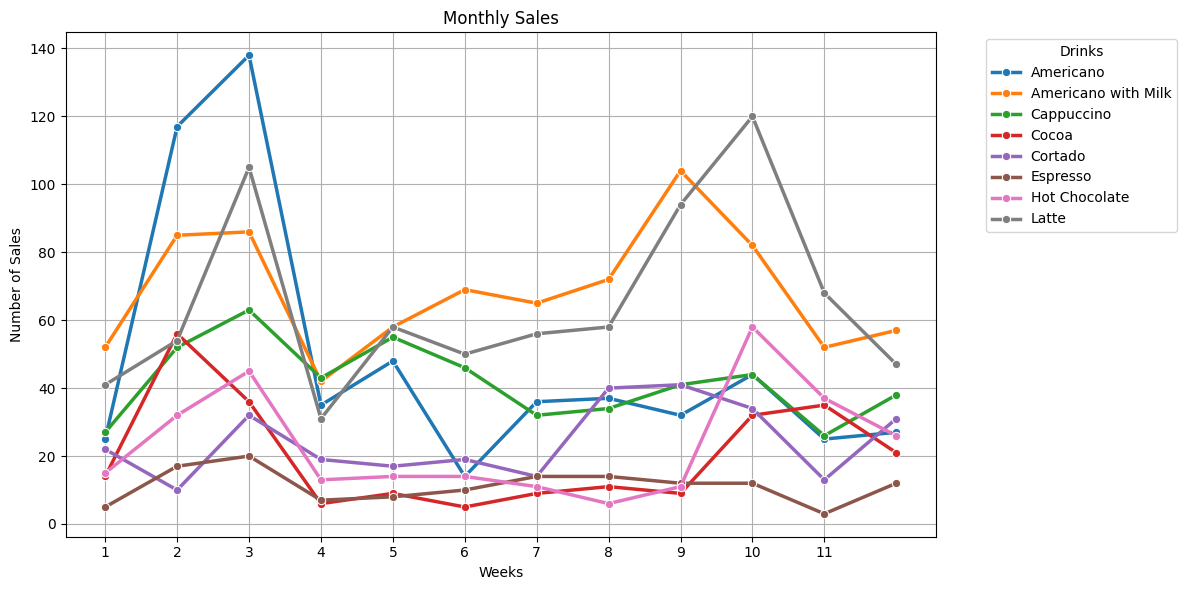

In [86]:
# Top performing drinks monthly
coffee_hour = df.groupby(['coffee_name', 'month']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=coffee_hour, x='month', y='count', hue='coffee_name', marker='o', linewidth=2.5)
plt.title("Monthly Sales")
plt.xlabel("Weeks")
plt.ylabel("Number of Sales")
plt.xticks(range(1, 12))
plt.legend(title='Drinks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

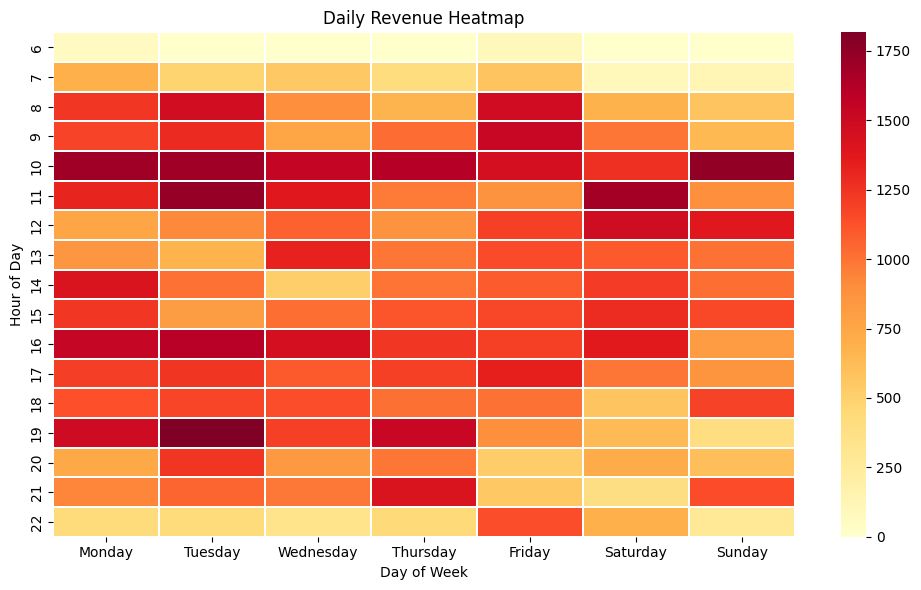

In [57]:
heatmap_data = df.groupby(['hour', 'day_of_week'])['money'].sum().unstack(fill_value=0)

# Optional: reorder columns by weekday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[weekday_order]

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.3)

plt.title("Daily import plotly.express as px

revenue_by_coffee = df.groupby('coffee_name')['card_money'].sum().reset_index()

fig = px.treemap(revenue_by_coffee, 
                 path=['coffee_name'], 
                 values='card_money',
                 color='card_money',
                 color_continuous_scale='Blues',
                 title='Coffee Type Revenue Contribution')
fig.show()
Revenue Heatmap")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

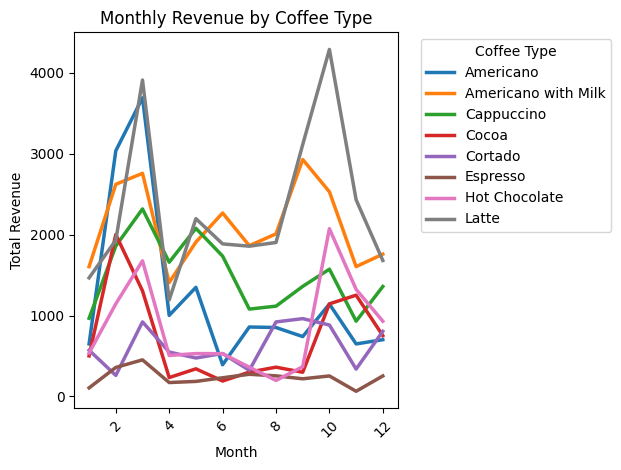

In [90]:
# Monthly revenue by drinks
monthly_coffee_rev = df.groupby(['month', 'coffee_name'])['money'].sum().reset_index()

sns.lineplot(data=monthly_coffee_rev, x='month', y='money', hue='coffee_name', linewidth=2.5)
plt.title("Monthly Revenue by Coffee Type")
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


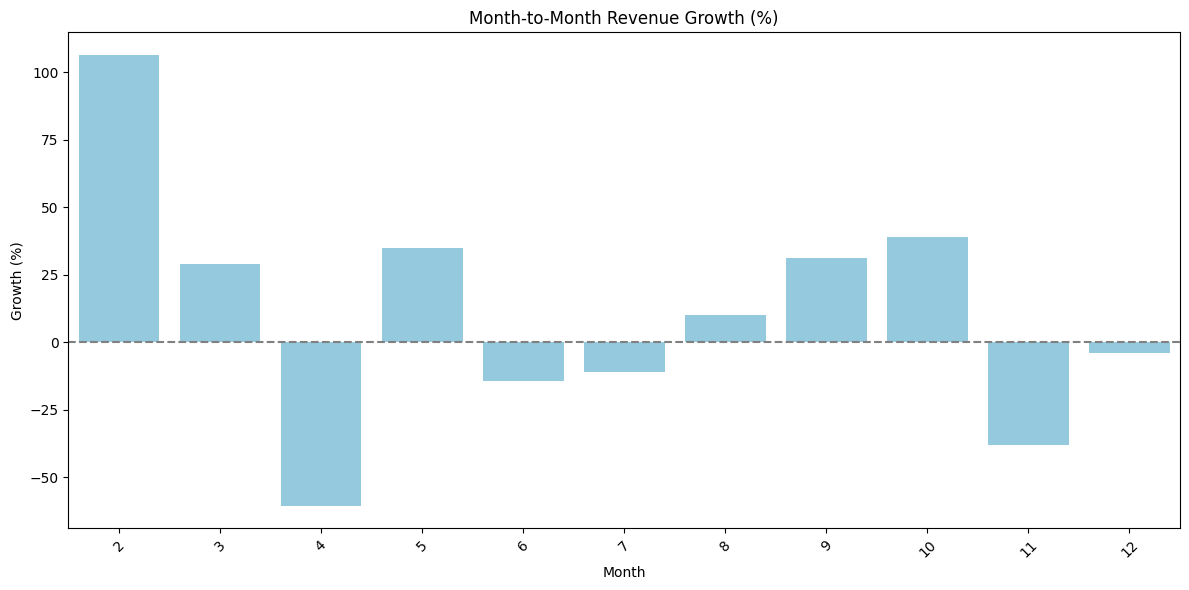

In [93]:
# Total revenue month to month
monthly_revenue = df.groupby('month')['money'].sum().reset_index()
monthly_revenue['money'] = monthly_revenue['money'].round(2)

monthly_revenue['MoM_Growth_%'] = monthly_revenue['money'].pct_change() * 100
monthly_revenue['MoM_Growth_%'] = monthly_revenue['MoM_Growth_%'].round(2)

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_revenue[1:], x='month', y='MoM_Growth_%', color='skyblue')  # Skip first month (NaN)

plt.axhline(0, color='gray', linestyle='--')
plt.title("Month-to-Month Revenue Growth (%)")
plt.xlabel("Month")
plt.ylabel("Growth (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()